# У клиентов вашей сети отелей есть возможность отказаться от бронирования, что приводит к тому, что часть номеров пустует даже в высокий сезон. Руководство компании хотело бы внедрить практику овербукинга — возможности забронировать больше номеров, чем есть в отеле.
Но непродуманная система овербукинга может привести к тому, что постояльцев действительно будет некуда поселить. Поэтому очень важно делать качественные и точные прогнозы отказов от бронирования.

При решении кейса вам необходимо комплексно подойти к построению модели и выполнить следующие шаги:

1 Провести базовую предварительную обработку данных: заполнить пропуски, очистить данные от дубликатов, провести масштабирование.

2 Выполнить продвинутую предобработку данных: сконструировать новые признаки (feature engineering) и удалить все ненужные.

3 Погрузиться в специфику обрабатываемых данных: рассчитать основные описательные статистики и построить несколько визуализаций.

4 Построить модель логистической регрессии, которая на вход будет получать данные, известные отелю до заселения, а на выходе давать прогноз, отменит клиент бронирование или нет. Оценить точность полученного прогноза.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df=pd.read_csv('C:\csv\Python-2-Case-1-with-expert.csv')
display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.company.unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

# 1 Провести базовую предварительную обработку данных: заполнить пропуски, очистить данные от дубликатов, провести масштабирование.

# Ищем пропуски

In [4]:
df.isnull().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Действия с пропусками

In [110]:
# Пропуски (4 шт) по графе Дети заменим на 0 - это не критично на таком объеме данных
df['children'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [111]:
# Пропуски (488 шт) в графе Страна удаляем по той же причине 
# axis=1 - удаялем столбцы где пропуски, axis=0 удаялем строки где пропуски
df.dropna(subset=['country'], axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

In [112]:
# Пропуски по графам agent - номер турагента и company - туристическая компания - имеют существенное количество пропусков
# поэтому удалять их нельзя - создадим новый ДФ без этих колонок для того чтоб иметь возможность в дальнейшем применить аналитику
del df['agent']
del df['company']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

In [8]:
df.isnull().sum() 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Ищем дубликаты

In [9]:
df.duplicated().sum()

31984

In [10]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


# Действия с дубликатами

In [113]:
df.drop_duplicates(inplace=True)  # Удалили дубликаты

In [9]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


# Масштабируем данные в 'adr' MinMaxScaler

НОРМАЛИЗАЦИЯ

In [114]:
from sklearn.preprocessing import MinMaxScaler # Импортируем библиотеку
min_max_scaler=MinMaxScaler()               # Инициализируем экземпляр класса
x=df['adr'].values.reshape(-1,1)        # Приводим к двумерному массиву
min_max_scaler.fit(x)                       # Определяем мин и макс параметры с помощью метода fit в переменную min_max_scaler
x_minmax_scaled=min_max_scaler.transform(x) # Нормализуем данные и создаем новую переменную x_minmax_scaled
df['adr_minmax']=x_minmax_scaled        # Создали столбец и внесли туда значения из x_minmax_scaled

СТАНДАРТИЗАЦИЯ

In [115]:
from sklearn.preprocessing import StandardScaler # Импортируем библиотеку
stand_scaler=StandardScaler()               # Инициализируем экземпляр класса
x=df['adr'].values.reshape(-1,1)          # Приводим к двумерному массиву
stand_scaler.fit(x)
x_standart_scaled=stand_scaler.transform(x)   # Стандартизируем данные и создаем новую переменную x_standart_scaled
df['adr_standart']=x_standart_scaled      # Создали столбец и внесли туда значения из x_standart_scaled

display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_minmax,adr_standart
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.939150
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.939150
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.574542
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.574542
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.019307,-0.156062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.018963,-0.189904
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.042877,2.162500
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.030351,0.930349
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.020491,-0.039615


In [15]:
df['adr'].describe()

count    86918.000000
mean       106.577274
std         54.961124
min         -6.380000
25%         72.250000
50%         98.400000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

# RobustScaler (Median and Quantile Scaling)

In [116]:

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
# df_robust = rs.fit_transform(df)
# tips_ds_rs_df = pd.DataFrame(df_robust,
#                               columns = df.columns)
# tips_ds_rs_df.head()

x=df['adr'].values.reshape(-1,1)        # Приводим к двумерному массиву
rs.fit(x)                       # Определяем мин и макс параметры с помощью метода fit в переменную min_max_scaler
x_robust_scaled=rs.transform(x) # Нормализуем данные и создаем новую переменную x_minmax_scaled
df['adr_robust']=x_robust_scaled        # Создали столбец и внесли туда значения из x_minmax_scaled

In [17]:
display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_minmax,adr_robust
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.590946
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.590946
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.019307,-0.006467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.018963,-0.036540
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.042877,2.053840
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.030351,0.958933
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.020491,0.097009


In [18]:
df['adr_robust'].describe()

count    86918.000000
mean         0.132211
std          0.888620
min         -1.694099
25%         -0.422797
50%          0.000000
75%          0.577203
max         85.717057
Name: adr_robust, dtype: float64

# 2 Выполнить продвинутую предобработку данных: сконструировать новые признаки (feature engineering) и удалить все ненужные.

СОЗДАЙТЕ ЕДИНЫЙ СТОЛБЕЦ ДЛЯ РАБОТЫ С ДАТОЙ

1. Используйте функцию strptime. Она позволяет преобразовывать строку в дату по маске, которая задается пользователем. Поищите в документации все виды масок, которые можно использовать в данной функции. Умение пользоваться документацией — важный навык аналитика.

2. Используйте функцию datetime.date. Она позволяет создавать дату из нескольких компонентов: год, месяц, день и т.д.

3. Не забывайте про лямбда-функции и df.apply. Это верные спутники аналитика, без них не обходится почти ни одна модель.

ОБЪЕДИНЯЕМ ТРИ КОЛОНКИ В ОДНУ И ПРЕОБРАЗУЕМ ДАТУ str В ЧИСЛО (datetime)

In [117]:
df['Arrival_Date'] = df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str) 
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])

In [20]:
display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_minmax,adr_robust,Arrival_Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.590946,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.590946,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.019307,-0.006467,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.018963,-0.036540,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.042877,2.053840,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.030351,0.958933,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.020491,0.097009,2017-08-31


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86918 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86918 non-null  object        
 1   is_canceled                     86918 non-null  int64         
 2   lead_time                       86918 non-null  int64         
 3   arrival_date_year               86918 non-null  int64         
 4   arrival_date_month              86918 non-null  object        
 5   arrival_date_week_number        86918 non-null  int64         
 6   arrival_date_day_of_month       86918 non-null  int64         
 7   stays_in_weekend_nights         86918 non-null  int64         
 8   stays_in_week_nights            86918 non-null  int64         
 9   adults                          86918 non-null  int64         
 10  children                        86918 non-null  float64       
 11  b

УДАЛЯЕМ 4 ИСХОДНЫХ СТОЛБЦА ДЛЯ ДАТЫ ПРИБЫТИЯ

In [41]:
# df=df.drop(['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month'], axis=1)

ПЕРЕНЕСЕМ КОЛОНКУ С ДАТОЙ ПРИБЫТИЯ В НАЧАЛО ДФ

In [118]:
col = df.pop("Arrival_Date")
df.insert(1, col.name, col)

ПРЕОБРАЗОВАЛИ НАЗВАНИЕ МЕСЯЦА В ЕГО ЧИСЛО И ПЕРЕНЕСЛИ СТОЛБЕЦ В НАЧАЛО

In [119]:
import datetime
import calendar
df['Month_Number'] = df['arrival_date_month'].apply(lambda x: list(calendar.month_name).index(x))
col = df.pop("Month_Number")
df.insert(6, col.name, col)

In [33]:
display(df)

,hotel,Arrival_Date,is_canceled,lead_time,arrival_date_year,arrival_date_month,Month_Number,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_minmax,adr_robust
0,Resort Hotel,2015-07-01,0,342,2015,July,7,27,1,0,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.590946
1,Resort Hotel,2015-07-01,0,737,2015,July,7,27,1,0,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.001180,-1.590946
2,Resort Hotel,2015-07-01,0,7,2015,July,7,27,1,0,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335
3,Resort Hotel,2015-07-01,0,13,2015,July,7,27,1,0,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335
4,Resort Hotel,2015-07-01,0,14,2015,July,7,27,1,0,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.019307,-0.006467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017-08-30,0,23,2017,August,8,35,30,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.018963,-0.036540
119386,City Hotel,2017-08-31,0,102,2017,August,8,35,31,2,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.042877,2.053840
119387,City Hotel,2017-08-31,0,34,2017,August,8,35,31,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.030351,0.958933
119388,City Hotel,2017-08-31,0,109,2017,August,8,35,31,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.020491,0.097009


СМОТРИМ КАКИЕ ЗНАЧЕНИЯ ЕСТЬ В КАЖДОЙ КОЛОНКЕ

In [15]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

hotel
['Resort Hotel' 'City Hotel']


Arrival_Date
['2015-07-01T00:00:00.000000000' '2015-07-02T00:00:00.000000000'
 '2015-07-03T00:00:00.000000000' '2015-07-04T00:00:00.000000000'
 '2015-07-05T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-07-07T00:00:00.000000000' '2015-07-08T00:00:00.000000000'
 '2015-07-09T00:00:00.000000000' '2015-07-10T00:00:00.000000000'
 '2015-07-11T00:00:00.000000000' '2015-07-12T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2015-07-14T00:00:00.000000000'
 '2015-07-15T00:00:00.000000000' '2015-07-16T00:00:00.000000000'
 '2015-07-17T00:00:00.000000000' '2015-07-18T00:00:00.000000000'
 '2015-07-19T00:00:00.000000000' '2015-07-20T00:00:00.000000000'
 '2015-07-21T00:00:00.000000000' '2015-07-22T00:00:00.000000000'
 '2015-07-23T00:00:00.000000000' '2015-07-24T00:00:00.000000000'
 '2015-07-25T00:00:00.000000000' '2015-07-26T00:00:00.000000000'
 '2015-07-27T00:00:00.000000000' '2015-07-28T00:00:00.000000000'
 '2015-07-29T00:00:00.000000000' '2015-

# 3 Погрузиться в специфику обрабатываемых данных: рассчитать основные описательные статистики и построить несколько визуализаций.

меры среднего,

меры разброса,

кваниль,

размах,

стандартное отклонение,

мода,

симметричность,

линейный график с отклонениями,

коэффициент асимметрии,

коэффициент эксцесса,

среднее,

медианное значение

ПРОСТОЙ НАБОР ОПИСАТЕЛЬНЫХ СТАТИСТИК describe

In [35]:
df.describe()

,is_canceled,lead_time,arrival_date_year,Month_Number,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_minmax,adr_robust
count,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,...,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000,86918.000000
mean,0.275973,80.199188,2016.211786,6.476645,26.841943,15.818024,1.007536,2.628938,1.878621,0.139246,...,0.039244,0.030235,0.176753,0.271900,0.753687,106.577274,0.083469,0.699567,0.020893,0.132211
std,0.447006,86.102516,0.686022,3.092705,13.653848,8.834601,1.028814,2.043850,0.625878,0.456839,...,0.194176,0.369621,1.718100,0.728163,10.043079,54.961124,0.280434,0.831874,0.010166,0.888620
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,-1.694099
25%,0.000000,12.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,0.014544,-0.422797
50%,0.000000,50.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000,0.019381,0.000000
75%,1.000000,125.000000,2017.000000,9.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,0.025984,0.577203
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,1.000000,85.717057


посмотреть:
1. зависимость между количеством дней от даты бронирования до даты заселения и отказом от бронирования

2. зависимость между количеством детей и отказом от бронирования

3. зависимость между стоимостью номера adr и отказом от бронирования

УБИРАЕМ ВЫБРОС В 10 ДЕТЕЙ

In [120]:
index_of_adr_anomaly=df[df.children==10].index
df.drop(index_of_adr_anomaly, inplace=True)

УБИРАЕМ ВЫБРОС В 5400 РУБ ЗА ОДНУ НОЧЬ

In [121]:
index_of_adr_anomaly=df[df.adr==5400].index
df.drop(index_of_adr_anomaly, inplace=True)

<Axes: xlabel='adr', ylabel='Count'>

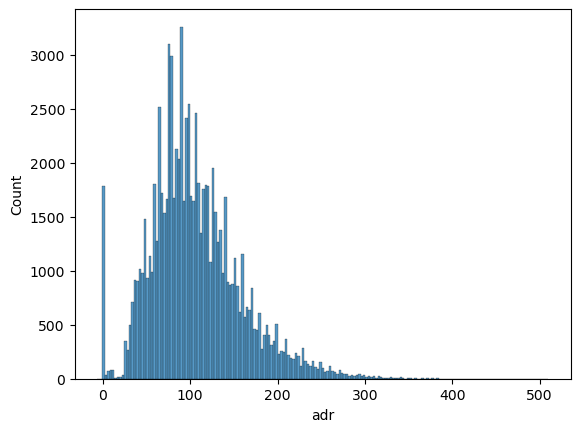

In [37]:
sns.histplot(df, x='adr')

СМОТРИМ ЦЕНЫ МЕНЬШЕ ИЛИ РАВНО НУЛЮ - УБИРАЕМ

In [38]:
df[df.adr<=0]

,hotel,Arrival_Date,is_canceled,lead_time,arrival_date_year,arrival_date_month,Month_Number,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_minmax,adr_robust
0,Resort Hotel,2015-07-01,0,342,2015,July,7,27,1,0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.00118,-1.590946
1,Resort Hotel,2015-07-01,0,737,2015,July,7,27,1,0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.00118,-1.590946
125,Resort Hotel,2015-07-04,0,32,2015,July,7,27,4,0,...,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-05,0.00118,-1.590946
167,Resort Hotel,2015-07-06,0,111,2015,July,7,28,6,0,...,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06,0.00118,-1.590946
168,Resort Hotel,2015-07-06,0,0,2015,July,7,28,6,0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06,0.00118,-1.590946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,2017-08-23,0,78,2017,August,8,34,23,0,...,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0.00118,-1.590946
118762,City Hotel,2017-08-24,0,1,2017,August,8,34,24,0,...,No Deposit,0,Transient,0.0,0,3,Check-Out,2017-08-25,0.00118,-1.590946
118963,City Hotel,2017-08-27,0,1,2017,August,8,35,27,0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-27,0.00118,-1.590946
119102,City Hotel,2017-08-26,0,518,2017,August,8,34,26,2,...,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29,0.00118,-1.590946


In [18]:
index_of_adr_anomaly=df[df.adr<=0].index
df.drop(index_of_adr_anomaly, inplace=True)

<Axes: xlabel='adr', ylabel='Count'>

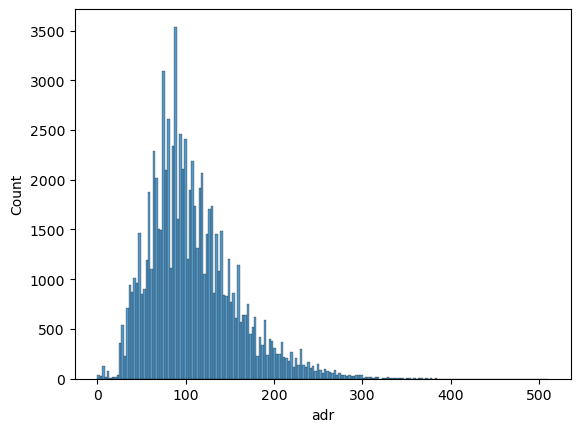

In [40]:
sns.histplot(df, x='adr')

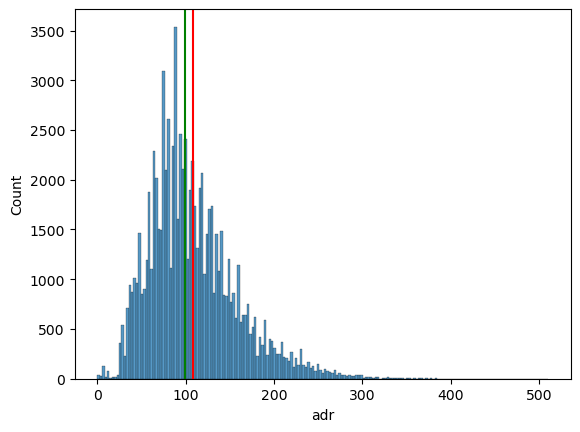

In [41]:
sns.histplot(df, x='adr')                    # Добавим среднее и медианное значение в гистограмму
plt.axvline(x=df.adr.mean(), color='red')    # axvline - добавить линию на гистограмму
plt.axvline(x=df.adr.median(), color='green')

СМОТРИМ СЕЗОННОСТЬ ЦЕН

In [19]:
df=df.sort_values(by=['arrival_date_year','Month_Number'])

In [48]:
df

,hotel,Arrival_Date,is_canceled,lead_time,arrival_date_year,arrival_date_month,Month_Number,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_minmax,adr_robust
74752,City Hotel,2015-07-29,1,148,2015,July,7,31,29,0,...,No Deposit,0,Transient,85.5,0,1,Canceled,2015-03-09,0.016995,-0.208569
74753,City Hotel,2015-07-29,1,148,2015,July,7,31,29,0,...,No Deposit,0,Transient,76.5,0,2,Canceled,2015-03-09,0.015330,-0.354082
73774,City Hotel,2015-07-23,1,279,2015,July,7,30,23,0,...,No Deposit,0,Transient-Party,62.8,0,0,Canceled,2014-10-17,0.012796,-0.575586
74254,City Hotel,2015-07-11,1,267,2015,July,7,28,11,2,...,No Deposit,0,Transient-Party,62.8,0,0,Canceled,2015-01-01,0.012796,-0.575586
73874,City Hotel,2015-07-02,1,258,2015,July,7,27,2,0,...,No Deposit,0,Contract,62.0,0,0,Canceled,2015-01-01,0.012648,-0.588521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39178,Resort Hotel,2017-08-09,0,2,2017,August,8,32,9,0,...,No Deposit,0,Transient,230.0,1,1,Check-Out,2017-08-10,0.043722,2.127728
73160,City Hotel,2017-08-16,1,54,2017,August,8,33,16,0,...,No Deposit,0,Transient,189.0,0,2,Canceled,2017-07-04,0.036139,1.464834
39177,Resort Hotel,2017-08-07,0,40,2017,August,8,32,7,1,...,No Deposit,0,Transient,387.0,0,3,Check-Out,2017-08-10,0.072762,4.666128
39176,Resort Hotel,2017-08-09,0,0,2017,August,8,32,9,0,...,No Deposit,0,Transient,244.0,1,0,Check-Out,2017-08-10,0.046312,2.354082


ПОСМОТРИМ РАСПРЕДЕЛЕНИЕ НЕКОТОРЫХ ДАННЫХ

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Online TA'),
  Text(1, 0, 'Groups'),
  Text(2, 0, 'Offline TA/TO'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Corporate'),
  Text(5, 0, 'Complementary'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

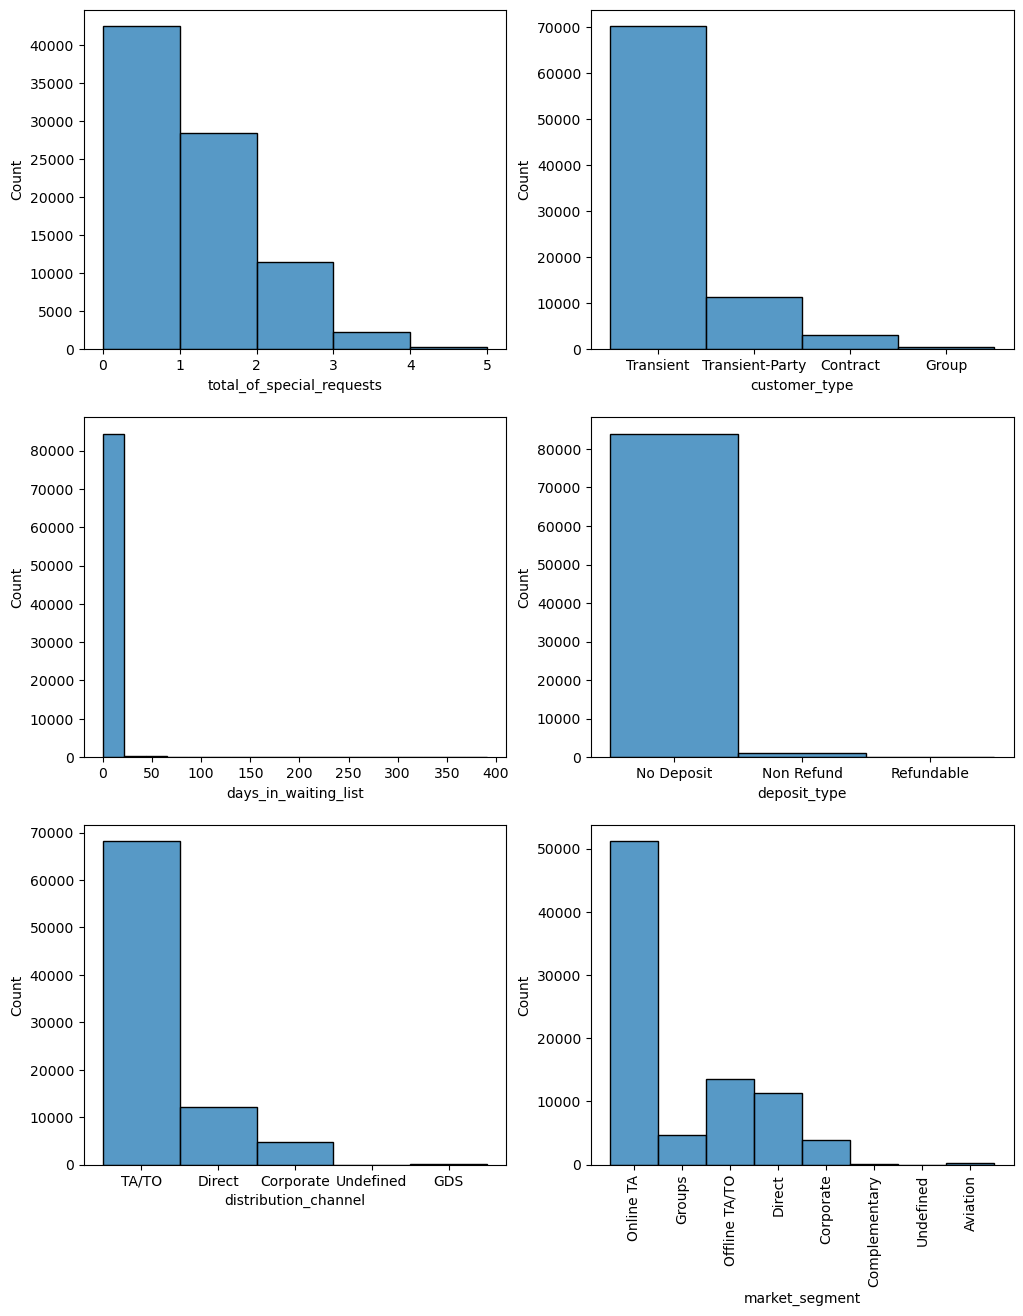

In [121]:
fig, axes=plt.subplots(3,2, figsize=(12, 15))

sns.histplot(df, x='total_of_special_requests',bins=5, ax=axes[0,0])
sns.histplot(df, x='customer_type', ax=axes[0,1])
sns.histplot(df, x='days_in_waiting_list', ax=axes[1,0])
sns.histplot(df, x='deposit_type', ax=axes[1,1])
sns.histplot(df, x='distribution_channel', ax=axes[2,0])
sns.histplot(df, x='market_segment', ax=axes[2,1])
plt.xticks(rotation=90)

<Axes: xlabel='adults', ylabel='Count'>

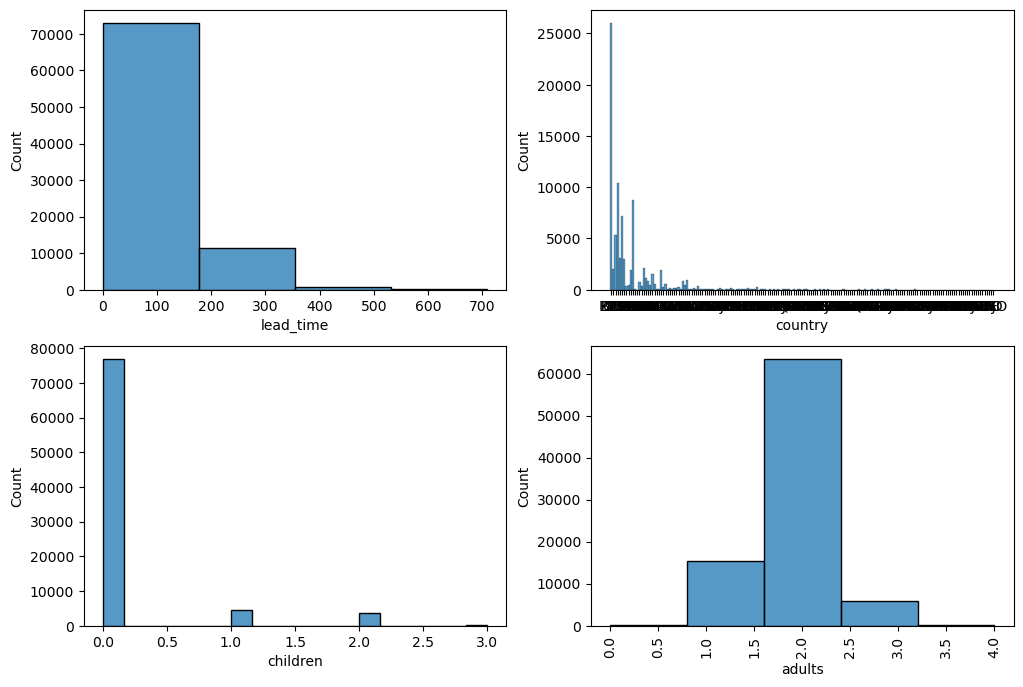

In [187]:
fig, axes=plt.subplots(2,2, figsize=(12, 8))

sns.histplot(df, x='lead_time',bins=4, ax=axes[0,0])
sns.histplot(df, x='country',bins=5, ax=axes[0,1]), plt.xticks(rotation=90)
sns.histplot(df, x='children', ax=axes[1,0])
sns.histplot(df, x='adults',bins=5, ax=axes[1,1])

<Axes: xlabel='lead_time'>

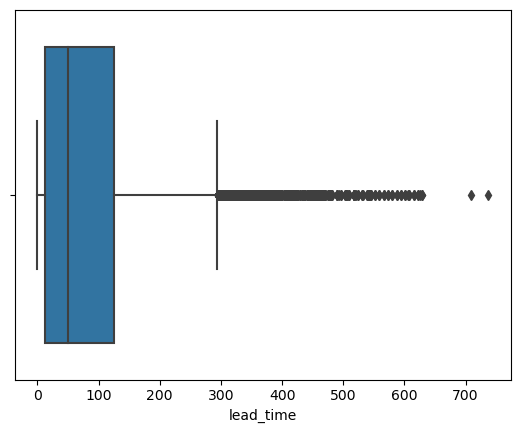

In [213]:
sns.boxplot(x=df['lead_time'])

BOXPLOT говорит о том, что 95% интервал lead-Time лежит от 0 до 300 дней

<Axes: xlabel='stays_in_weekend_nights'>

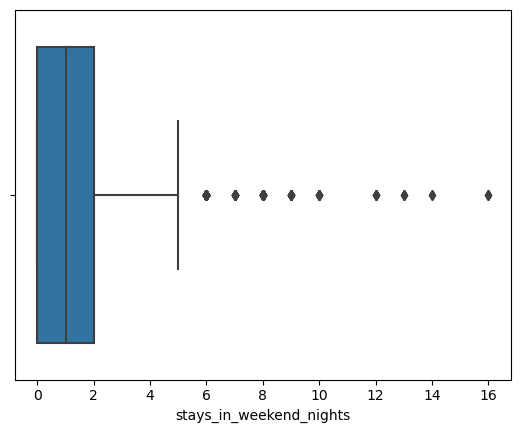

In [216]:
sns.boxplot(x=df['stays_in_weekend_nights'])

BOXPLOT говорит о том, что 95% интервал тех, что остается на выходные лежит от 0 до 5 дней

<Axes: xlabel='stays_in_week_nights'>

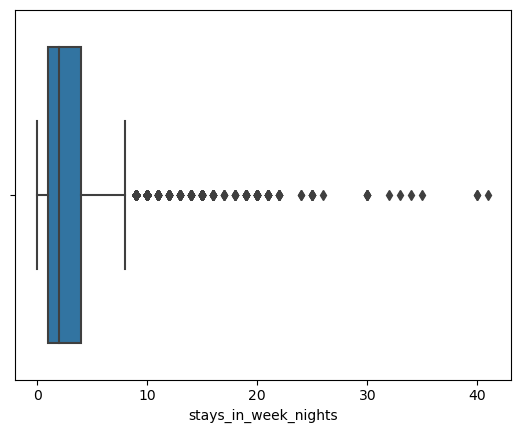

In [215]:
sns.boxplot(x=df['stays_in_week_nights'])

ЗАВИСИМОСТЬ ОТМЕН ОТ КОЛИЧЕСТВА ДЕТЕЙ

([<matplotlib.axis.XTick at 0x2001f7f8cd0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

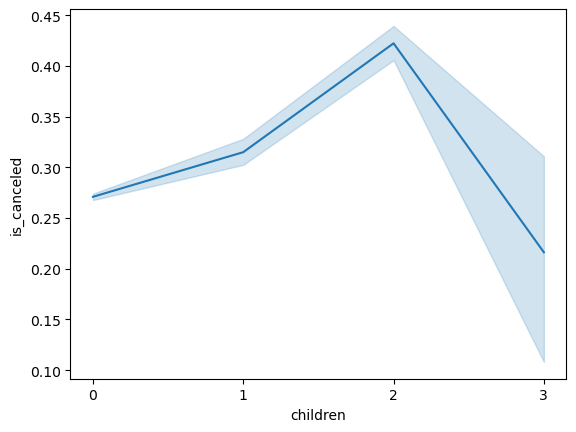

In [20]:
df['children']=df['children'].astype('int') # Привели формат ячейки children к int чтоб настроить ось Х
sns.lineplot(data=df, x='children', y='is_canceled', sort=True)  
plt.xticks(range(min(df['children']), max(df['children'])+1, 1)) # Настроили ось Х (начало, конец +1, шаг1)

ЗАВИСИМОСТЬ КОЛ-ВА ОТМЕН ОТ ВРЕМЕНИ ОЖИДАНИЯ

In [195]:
df['lead_time'].max()

709

In [122]:
# УКРУПНИМ ДО МЕСЯЦА ЗНАЧЕНИЯ КОЛОНКИ КОЛИЧЕСТВО ДНЕЙ ОЖИДАНИЯ. ПРЕДЕЛ ИНТЕРВАЛА - 1 ГОД. ВСЕ ЧТО БОЛЕЕ = БОЛЬШЕ ГОДА
df['lead_time_month'] = df['lead_time'].apply(lambda x: '12' if x >= 365  
                                            else ('11' if x >= 30*11 
                                            else ('10' if x >= 30*10
                                            else('9' if x >= 30*9
                                            else('8' if x >= 30*8
                                            else('7' if x >= 30*7
                                            else('6' if x >= 30*6
                                            else('5' if x >= 30*5
                                            else('4' if x >= 30*4
                                            else('3' if x >= 30*3
                                            else('2' if x >= 30*2
                                            else('1' if x >= 30
                                            else '0')))))))))))).astype('int')

col = df.pop("lead_time_month")
df.insert(4, col.name, col)
df_lead_time_sorted= df.sort_values(by=['lead_time_month'], ascending=False)


Text(0.5, 1.0, 'Изменение количества отмен от времени (мес) за которое сделана бронь')

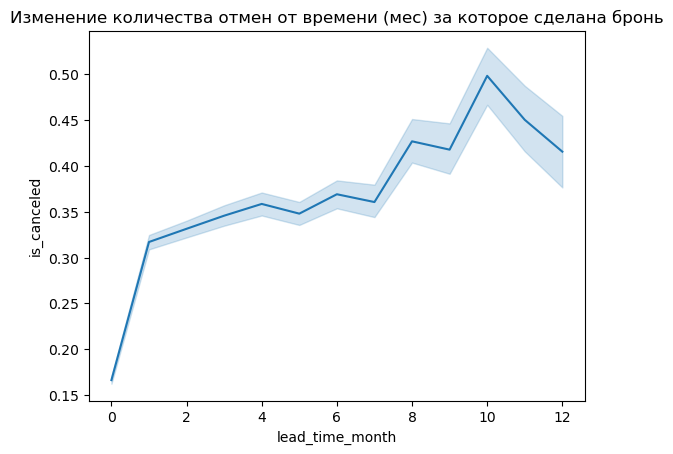

In [227]:
sns.lineplot(data=df, x='lead_time_month', y='is_canceled', sort=True)  
plt.title('Изменение количества отмен от времени (мес) за которое сделана бронь')

ПОСМОТРИМ ДИНАМИКУ ЦЕН (СЕЗОННОСТЬ)

<Axes: xlabel='Month_Number', ylabel='adr'>

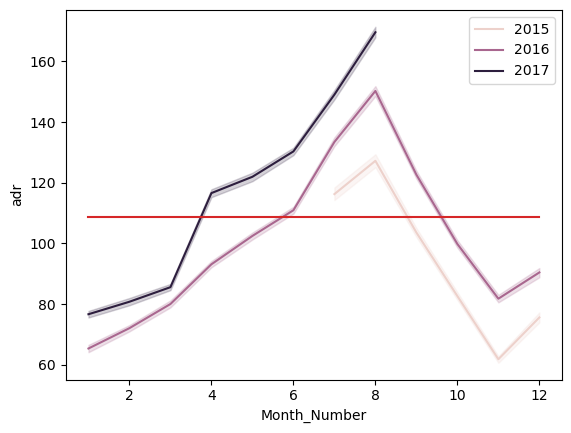

In [95]:
sns.lineplot(data=df, x='Month_Number', hue='arrival_date_year', y='adr', sort=True)            # отклонения внутри месяца (по всем годам) заштрихованы
sns.lineplot(x=df.Month_Number.unique(), y=df.adr.mean(), sort=True)   # Рисуем линейный график средней (приямая)

СМОТРИМ СЕЗОННОСТЬ ОТКАЗОВ ОТ БРОНИРОВАНИЯ

<Axes: xlabel='Month_Number', ylabel='is_canceled'>

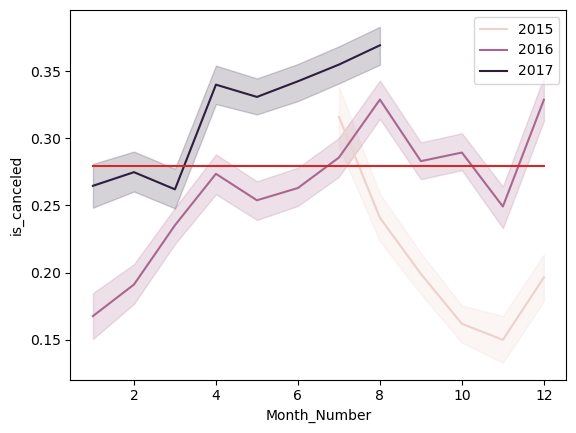

In [96]:
sns.lineplot(data=df, x='Month_Number', y='is_canceled', hue='arrival_date_year',sort=True)            # отклонения внутри месяца (по всем годам) заштрихованы
sns.lineplot(x=df.Month_Number.unique(), y=df.is_canceled.mean(), sort=True)   # Рисуем линейный график средней (приямая)

In [160]:
df['is_canceled'].sum()

23806

ПОСМОТРИМ КАК РАСПРЕДЕЛИЛИСЬ ОТМЕНЫ. ПОСТРОИМ СВОДНЫЕ ТАБЛИЦЫ

1. ОТКАЗЫ ПО СТРАНАМ

In [123]:
country_orders=df['country'].value_counts()
country_orders.head(10)

PRT    27438
GBR    10431
FRA     8837
ESP     7250
DEU     5385
ITA     3065
IRL     3016
BEL     2081
BRA     1993
NLD     1911
Name: country, dtype: int64

In [209]:
# СОЗДАЛИ СВОДНУЮ ТАБЛИЦУ ТОР10, ОСТОРТИРОВАЛИ ПО УБЫВАНИЮ
pivot_country_top=df.pivot_table(values='is_canceled', index='country', aggfunc='sum').sort_values(by='is_canceled' ,ascending=False)

# СОЗДАЛИ ОБЩУЮ СВОДНУЮ ТАЛИЦУ ЧТОБЫ ПОСЧИТАТЬ СУММУ 
pivot_country=df.pivot_table(values='is_canceled', index='country', aggfunc='sum')

# Добавили строку с суммой всех данных (не только ТОР10)
pivot_country_top.loc['Total'] = pivot_country.sum() 


# Добавляем столбец 'Percent' с долями в процентах ОТ ОБЕГО ЧИСЛА ОТКАЗОВ
pivot_country_top['Canceled_Percent'] = round(pivot_country_top.sum(axis=1) / df['is_canceled'].sum() * 100, 2)

# Добавляем столбец 'Bookings' всего заказов в по странам
pivot_country_top['Bookings'] = df['country'].value_counts()

# Добавляем столбец 'Bookings_Percent' с долями в процентах ОТ ОБЩЕГО ЧИСЛА ЗАКАЗОВ
pivot_country_top['Bookings_Percent'] = round(pivot_country_top.sum(axis=1) / df['country'].count() * 100, 2)

# Добавляем столбец 'Percent Cancels / Bookings' = КОЛИЧЕСТВО ОТКАЗОВ В ЗАКАЗАХ ОТ СТРАНЫ
pivot_country_top['Percent Cancels / Bookings'] = round(pivot_country_top['is_canceled']/pivot_country_top['Bookings'] * 100,2)

pivot_country_top=pivot_country_top.reset_index()

display(pivot_country_top.head(10).sort_values(by='Percent Cancels / Bookings' ,ascending=False))

,country,is_canceled,Canceled_Percent,Bookings,Bookings_Percent,Percent Cancels / Bookings
6,BRA,727,3.03,1993.0,3.13,36.48
0,PRT,9785,40.80,27438.0,42.87,35.66
4,ITA,1075,4.48,3065.0,4.77,35.07
2,ESP,1862,7.76,7250.0,10.49,25.68
8,USA,459,1.91,1875.0,2.69,24.48
7,IRL,668,2.79,3016.0,4.24,22.15
9,BEL,411,1.71,2081.0,2.87,19.75
3,FRA,1733,7.23,8837.0,12.17,19.61
5,DEU,1053,4.39,5385.0,7.41,19.55
1,GBR,1985,8.28,10431.0,14.29,19.03


Text(0.5, 1.0, 'Процент отказов гостей из празных стран')

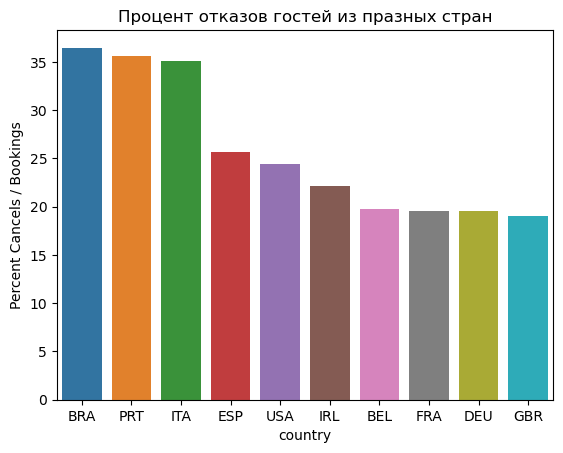

In [210]:
sns.barplot(data=pivot_country_top.head(10).sort_values(by='Percent Cancels / Bookings' ,ascending=False), x='country', y='Percent Cancels / Bookings')
plt.title('Процент отказов гостей из празных стран')

2. ОТКАЗЫ СРЕДИ CUSTOMER_TYPE

In [211]:
# СОЗДАЛИ СВОДНУЮ ТАБЛИЦУ ТОР10, ОСТОРТИРОВАЛИ ПО УБЫВАНИЮ
pivot_customer_type_top=df.pivot_table(values='is_canceled', index='customer_type', aggfunc='sum').sort_values(by='is_canceled' ,ascending=False)

# СОЗДАЛИ ОБЩУЮ СВОДНУЮ ТАЛИЦУ ЧТОБЫ ПОСЧИТАТЬ СУММУ 
pivot_customer_type=df.pivot_table(values='is_canceled', index='customer_type', aggfunc='sum')

# Добавляем столбец 'Bookings' всего заказов в по странам
pivot_customer_type_top['Bookings'] = df['customer_type'].value_counts()

# Добавляем столбец 'Percent Cancels / Bookings' = КОЛИЧЕСТВО ОТКАЗОВ В ЗАКАЗАХ ОТ СТРАНЫ
pivot_customer_type_top['Percent Cancels / Bookings'] = round(pivot_customer_type_top['is_canceled']/pivot_customer_type_top['Bookings'] * 100,2)

# Добавили строку с суммой всех данных (не только ТОР10)
pivot_customer_type_top.loc['Total'] = pivot_customer_type.sum() 
pivot_customer_type_top=pivot_customer_type_top.reset_index()

display(pivot_customer_type_top.head(10).sort_values(by='Percent Cancels / Bookings' ,ascending=False))

,customer_type,is_canceled,Bookings,Percent Cancels / Bookings
0,Transient,21636.0,71553.0,30.24
2,Contract,511.0,3138.0,16.28
1,Transient-Party,1785.0,11688.0,15.27
3,Group,53.0,537.0,9.87
4,Total,23985.0,NaN,NaN


Text(0.5, 1.0, 'Процент отказов гостей по ТИПУ ПОКУПАТЕЛЯ')

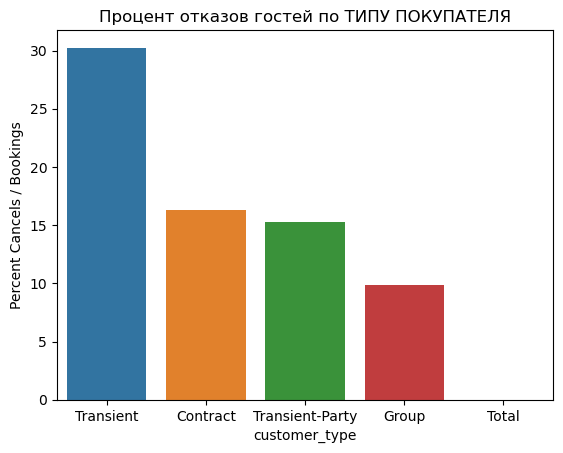

In [212]:
sns.barplot(data=pivot_customer_type_top.head(10).sort_values(by='Percent Cancels / Bookings' ,ascending=False), x='customer_type', y='Percent Cancels / Bookings')
plt.title('Процент отказов гостей по ТИПУ ПОКУПАТЕЛЯ')

3. ОТКАЗЫ СРЕДИ TOTAL_OF_SPECIAL_REQUEST

In [126]:
# СОЗДАЛИ СВОДНУЮ ТАБЛИЦУ ТОР10, ОСТОРТИРОВАЛИ ПО УБЫВАНИЮ
pivot_total_of_special_requests_top=df.pivot_table(values='is_canceled', index='total_of_special_requests', aggfunc='sum').sort_values(by='is_canceled' ,ascending=False)

# СОЗДАЛИ ОБЩУЮ СВОДНУЮ ТАЛИЦУ ЧТОБЫ ПОСЧИТАТЬ СУММУ 
pivot_total_of_special_requests=df.pivot_table(values='is_canceled', index='total_of_special_requests', aggfunc='sum')

# Добавляем столбец 'Bookings' всего заказов в по странам
pivot_total_of_special_requests_top['Bookings'] = df['total_of_special_requests'].value_counts()

# Добавляем столбец 'Percent Cancels / Bookings' = КОЛИЧЕСТВО ОТКАЗОВ В ЗАКАЗАХ ОТ СТРАНЫ
pivot_total_of_special_requests_top['Percent Cancels / Bookings'] = round(pivot_total_of_special_requests_top['is_canceled']/pivot_total_of_special_requests_top['Bookings'] * 100,2)

# Добавили строку с суммой всех данных (не только ТОР10)
pivot_total_of_special_requests_top.loc['Total'] = pivot_total_of_special_requests.sum() 
pivot_total_of_special_requests_top=pivot_total_of_special_requests_top.reset_index()

display(pivot_total_of_special_requests_top.head(10).sort_values(by='Percent Cancels / Bookings' ,ascending=False))

,total_of_special_requests,is_canceled,Bookings,Percent Cancels / Bookings
0,0,14547.0,43584.0,33.38
1,1,6498.0,28907.0,22.48
2,2,2510.0,11765.0,21.33
3,3,395.0,2307.0,17.12
4,4,34.0,319.0,10.66
5,5,1.0,34.0,2.94
6,Total,23985.0,NaN,NaN


4. ОТКАЗЫ СРЕДИ MARKET_SEGMENT

In [127]:

# СОЗДАЛИ СВОДНУЮ ТАБЛИЦУ ТОР10, ОСТОРТИРОВАЛИ ПО УБЫВАНИЮ
pivot_market_segment_top=df.pivot_table(values='is_canceled', index='market_segment', aggfunc='sum').sort_values(by='is_canceled' ,ascending=False)

# СОЗДАЛИ ОБЩУЮ СВОДНУЮ ТАЛИЦУ ЧТОБЫ ПОСЧИТАТЬ СУММУ 
pivot_market_segment=df.pivot_table(values='is_canceled', index='market_segment', aggfunc='sum')

# Добавляем столбец 'Bookings' всего заказов в по странам
pivot_market_segment_top['Bookings'] = df['market_segment'].value_counts()

# Добавляем столбец 'Percent Cancels / Bookings' = КОЛИЧЕСТВО ОТКАЗОВ В ЗАКАЗАХ ОТ СТРАНЫ
pivot_market_segment_top['Percent Cancels / Bookings'] = round(pivot_market_segment_top['is_canceled']/pivot_market_segment_top['Bookings'] * 100,2)

# Добавили строку с суммой всех данных (не только ТОР10)
pivot_market_segment_top.loc['Total'] = pivot_market_segment.sum() 

pivot_market_segment_top=pivot_market_segment_top.head(10).sort_values(by='Percent Cancels / Bookings' ,ascending=False).reset_index()
display(pivot_market_segment_top)

,market_segment,is_canceled,Bookings,Percent Cancels / Bookings
0,Undefined,2.0,2.0,100.00
1,Online TA,18244.0,51535.0,35.40
2,Groups,1335.0,4936.0,27.05
3,Aviation,45.0,227.0,19.82
4,Offline TA/TO,2052.0,13847.0,14.82
5,Direct,1724.0,11646.0,14.80
6,Corporate,497.0,4025.0,12.35
7,Complementary,86.0,698.0,12.32
8,Total,23985.0,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Online TA'),
  Text(1, 0, 'Groups'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Direct'),
  Text(5, 0, 'Corporate'),
  Text(6, 0, 'Complementary')])

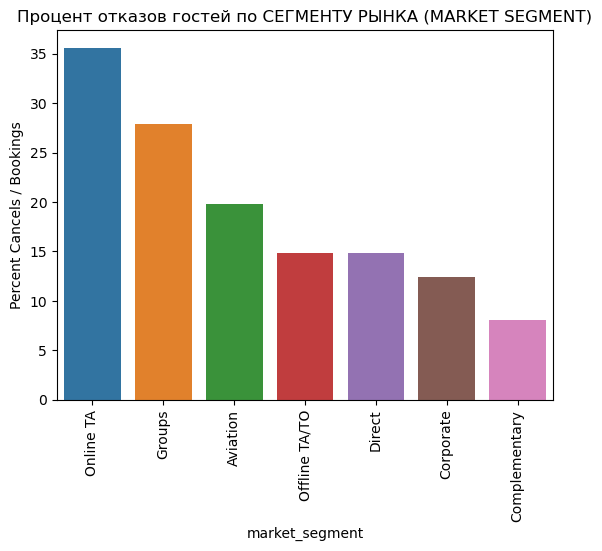

In [82]:
# УДАЛИМ НИЗВЕСТНОЕ ЗНАЧЕНИЕ (UNDEFINED и TOTAL)
sns.barplot(data=pivot_market_segment_top.drop(0).drop(8).sort_values(by='Percent Cancels / Bookings' ,ascending=False), x='market_segment', y='Percent Cancels / Bookings')
plt.title('Процент отказов гостей по СЕГМЕНТУ РЫНКА (MARKET SEGMENT)')
plt.xticks(rotation=90)

ПОСМОТРИМ КОРЕЛЛЯЦИЮ ВСЕГОТ ДФ

In [81]:
df_corr=df.corr()

col = df_corr["is_canceled"].abs()
df_corr.insert(0, 'abs', col)   # Вставил столбец с новым именем

column_indices_to_drop = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21] # Список индексов столбцов для удаления

df_corr.drop(df_corr.columns[column_indices_to_drop], axis=1, inplace=True)  # Удалим указанные столбцы по индексам

df_corr=df_corr.sort_values(by=['abs'], ascending=False)  # Отсортируем по модулю
df_corr

C:\Users\Prus\AppData\Local\Temp\ipykernel_7732\4128079490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


,abs,is_canceled
is_canceled,1.000000,1.000000
required_car_parking_spaces,0.186020,-0.186020
lead_time,0.181435,0.181435
total_of_special_requests,0.123636,-0.123636
adr,0.121628,0.121628
adr_minmax,0.121628,0.121628
adr_robust,0.121628,0.121628
booking_changes,0.093179,-0.093179
arrival_date_year,0.086515,0.086515
is_repeated_guest,0.082729,-0.082729


ПОЧИСТИМ ДАТАФРЕЙМ ДЛЯ СОЗДАНИЯ ЧИТАЕМОЙ МАТРИЦЫ КОРЕЛЛЯЦИИ

In [132]:
columns_to_drop = ['hotel',
                  'Arrival_Date',
                  'lead_time',
                  'arrival_date_year',
                  'arrival_date_month',
                  'arrival_date_week_number',
                  'arrival_date_day_of_month',
                  'adr_minmax',
                  'adr_robust',
                  'reservation_status_date',
                  'reservation_status',
                  'meal']

df_for_corr = df.drop(columns=columns_to_drop)  # Удалим указанные столбцы по именам
df_for_corr

,is_canceled,lead_time_month,Month_Number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,market_segment,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_standart
0,0,11,7,0,0,2,0.0,0,PRT,Direct,...,C,C,3,No Deposit,0,Transient,0.00,0,0,-1.939150
1,0,12,7,0,0,2,0.0,0,PRT,Direct,...,C,C,4,No Deposit,0,Transient,0.00,0,0,-1.939150
2,0,0,7,0,1,1,0.0,0,GBR,Direct,...,A,C,0,No Deposit,0,Transient,75.00,0,0,-0.574542
3,0,0,7,0,1,1,0.0,0,GBR,Corporate,...,A,A,0,No Deposit,0,Transient,75.00,0,0,-0.574542
4,0,0,7,0,2,2,0.0,0,GBR,Online TA,...,A,A,0,No Deposit,0,Transient,98.00,0,1,-0.156062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,8,2,5,2,0.0,0,BEL,Offline TA/TO,...,A,A,0,No Deposit,0,Transient,96.14,0,0,-0.189904
119386,0,3,8,2,5,3,0.0,0,FRA,Online TA,...,E,E,0,No Deposit,0,Transient,225.43,0,2,2.162500
119387,0,1,8,2,5,2,0.0,0,DEU,Online TA,...,D,D,0,No Deposit,0,Transient,157.71,0,4,0.930349
119388,0,3,8,2,5,2,0.0,0,GBR,Online TA,...,A,A,0,No Deposit,0,Transient,104.40,0,0,-0.039615


In [249]:
corellation_matrix = df_for_corr.corr()

corellation_matrix.sort_values(by='is_canceled')

C:\Users\Prus\AppData\Local\Temp\ipykernel_7732\3350640541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corellation_matrix = df_for_corr.corr()


,is_canceled,lead_time_month,Month_Number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
required_car_parking_spaces,-0.186017,-0.082247,0.009143,-0.044633,-0.046104,0.010986,0.037025,0.029869,0.080688,-0.002607,0.043482,0.052182,-0.015716,0.041434,1.000000,0.046337
total_of_special_requests,-0.123645,0.033205,0.051354,0.031981,0.036487,0.142947,0.043861,0.093556,-0.009611,-0.005817,0.012575,0.019217,-0.049433,0.150021,0.046337,1.000000
booking_changes,-0.093230,0.082476,0.013464,0.030100,0.062031,-0.046807,0.033130,0.085838,0.008422,-0.009594,0.006839,1.000000,0.023324,0.017622,0.052182,0.019217
is_repeated_guest,-0.082727,-0.126036,-0.042707,-0.093396,-0.096904,-0.206346,-0.043610,-0.013302,1.000000,0.202499,0.447275,0.008422,-0.011527,-0.125183,0.080688,-0.009611
previous_bookings_not_canceled,-0.048415,-0.067599,-0.021956,-0.049355,-0.053760,-0.143005,-0.027523,-0.008836,0.447275,0.387430,1.000000,0.006839,-0.005659,-0.075776,0.043482,0.012575
babies,-0.020950,-0.002579,0.012661,0.015053,0.017153,0.019343,0.016388,1.000000,-0.013302,-0.005196,-0.008836,0.085838,-0.006746,0.026963,0.029869,0.093556
Month_Number,0.004547,0.107554,1.000000,0.028598,0.034444,0.027630,0.014084,0.012661,-0.042707,0.007018,-0.021956,0.013464,0.011246,0.123155,0.009143,0.051354
days_in_waiting_list,0.004800,0.129237,0.011246,-0.033454,0.000193,-0.016559,-0.020437,-0.006746,-0.011527,0.004200,-0.005659,0.023324,1.000000,-0.035615,-0.015716,-0.049433
previous_cancellations,0.052742,0.011875,0.007018,-0.017746,-0.016416,-0.047983,-0.018214,-0.005196,0.202499,1.000000,0.387430,-0.009594,0.004200,-0.048081,-0.002607,-0.005817
stays_in_weekend_nights,0.055626,0.226655,0.028598,1.000000,0.541033,0.099706,0.026389,0.015053,-0.093396,-0.017746,-0.049355,0.030100,-0.033454,0.015691,-0.044633,0.031981


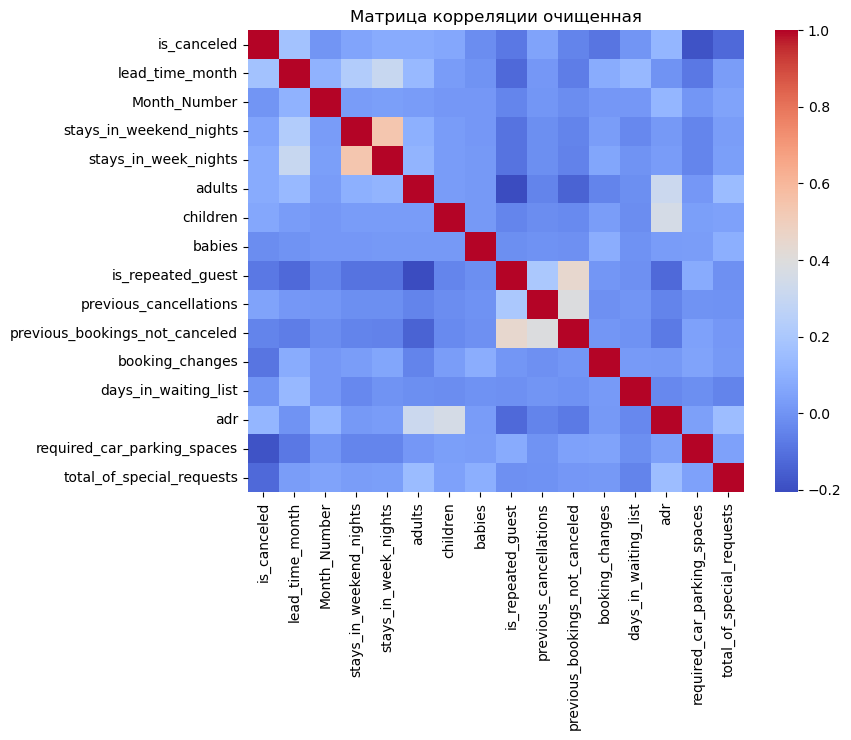

In [245]:
plt.figure(figsize=(8, 6))
sns.heatmap(corellation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции очищенная')
plt.show()

# 4 Построить модель логистической регрессии, которая на вход будет получать данные, известные отелю до заселения, а на выходе давать прогноз, отменит клиент бронирование или нет. Оценить точность полученного прогноза.

In [92]:
df

,hotel,Arrival_Date,is_canceled,lead_time,lead_time_month,arrival_date_year,arrival_date_month,Month_Number,arrival_date_week_number,arrival_date_day_of_month,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_minmax,adr_robust,adr_standart
2,Resort Hotel,2015-07-01,0,7,0,2015,July,7,27,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335,-0.672488
3,Resort Hotel,2015-07-01,0,13,0,2015,July,7,27,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.015053,-0.378335,-0.672488
4,Resort Hotel,2015-07-01,0,14,0,2015,July,7,27,1,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.019307,-0.006467,-0.213812
6,Resort Hotel,2015-07-01,0,0,0,2015,July,7,27,1,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,0.020972,0.139046,-0.034330
7,Resort Hotel,2015-07-01,0,9,0,2015,July,7,27,1,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,0.020232,0.074373,-0.114099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017-08-30,0,23,0,2017,August,8,35,30,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.018963,-0.036540,-0.250905
119386,City Hotel,2017-08-31,0,102,3,2017,August,8,35,31,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.042877,2.053840,2.327454
119387,City Hotel,2017-08-31,0,34,1,2017,August,8,35,31,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.030351,0.958933,0.976952
119388,City Hotel,2017-08-31,0,109,3,2017,August,8,35,31,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.020491,0.097009,-0.086180


In [129]:
df.columns.tolist()


['hotel',
 'Arrival_Date',
 'is_canceled',
 'lead_time',
 'lead_time_month',
 'arrival_date_year',
 'arrival_date_month',
 'Month_Number',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'adr_minmax',
 'adr_standart',
 'adr_robust']

УДАЛИЛЯЕМ ЛИШНИЕ СТОЛБЦЫ ДЛЯ ПОСТРОЕНИЯ ЗАВИСИМОСТЕЙ

In [161]:
columns_to_drop = ['meal',
                  'reservation_status',
                  'reservation_status_date',
                  'babies',
                  'Month_Number',
                  'reserved_room_type',
                  'assigned_room_type',
                  'lead_time_month',
                  'arrival_date_year',
                  'arrival_date_week_number',
                  'stays_in_weekend_nights',
                  'stays_in_week_nights']

df_cut = df.drop(columns=columns_to_drop)  # Удалим указанные столбцы по именам
df_cut

,hotel,Arrival_Date,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,country,market_segment,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_minmax,adr_standart,adr_robust
0,Resort Hotel,2015-07-01,0,342,July,1,2,0.0,PRT,Direct,...,3,No Deposit,0,Transient,0.00,0,0,0.001180,-1.939150,-1.590946
1,Resort Hotel,2015-07-01,0,737,July,1,2,0.0,PRT,Direct,...,4,No Deposit,0,Transient,0.00,0,0,0.001180,-1.939150,-1.590946
2,Resort Hotel,2015-07-01,0,7,July,1,1,0.0,GBR,Direct,...,0,No Deposit,0,Transient,75.00,0,0,0.015053,-0.574542,-0.378335
3,Resort Hotel,2015-07-01,0,13,July,1,1,0.0,GBR,Corporate,...,0,No Deposit,0,Transient,75.00,0,0,0.015053,-0.574542,-0.378335
4,Resort Hotel,2015-07-01,0,14,July,1,2,0.0,GBR,Online TA,...,0,No Deposit,0,Transient,98.00,0,1,0.019307,-0.156062,-0.006467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017-08-30,0,23,August,30,2,0.0,BEL,Offline TA/TO,...,0,No Deposit,0,Transient,96.14,0,0,0.018963,-0.189904,-0.036540
119386,City Hotel,2017-08-31,0,102,August,31,3,0.0,FRA,Online TA,...,0,No Deposit,0,Transient,225.43,0,2,0.042877,2.162500,2.053840
119387,City Hotel,2017-08-31,0,34,August,31,2,0.0,DEU,Online TA,...,0,No Deposit,0,Transient,157.71,0,4,0.030351,0.930349,0.958933
119388,City Hotel,2017-08-31,0,109,August,31,2,0.0,GBR,Online TA,...,0,No Deposit,0,Transient,104.40,0,0,0.020491,-0.039615,0.097009


In [162]:
df_cut.columns.tolist()

['hotel',
 'Arrival_Date',
 'is_canceled',
 'lead_time',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'adults',
 'children',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'adr_minmax',
 'adr_standart',
 'adr_robust']

ЗАМЕНЯЕМ КАТЕГОРИАЛЬНЫЕ ЗНАЧЕНИЯ НА ЧИСЛОВЫЕ

In [137]:
df['hotel'].value_counts()

City Hotel      53407
Resort Hotel    33509
Name: hotel, dtype: int64

In [163]:
hotel_cat = pd.get_dummies(df_cut.hotel)           # РАЗНЕСЕМ ЗНАЧЕНИЯ hotel ПО СТОЛБЦАМ И ЗАПИШЕМ В *_cat
df_cut = pd.concat([df_cut, hotel_cat], axis = 1)  # ЗАНЕСЕМ *_cat В НАШ ДАТАФРЕЙМ
df_cut.drop("hotel", inplace = True, axis = 1)     # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

In [141]:
df['deposit_type'].value_counts()

No Deposit    85773
Non Refund     1036
Refundable      107
Name: deposit_type, dtype: int64

In [164]:
deposit_cat = pd.get_dummies(df_cut.deposit_type)           # РАЗНЕСЕМ ЗНАЧЕНИЯ hotel ПО СТОЛБЦАМ И ЗАПИШЕМ В *_cat
df_cut = pd.concat([df_cut, deposit_cat], axis = 1)  # ЗАНЕСЕМ *_cat В НАШ ДАТАФРЕЙМ
df_cut.drop("deposit_type", inplace = True, axis = 1)     # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

In [144]:
df['customer_type'].value_counts()

Transient          71553
Transient-Party    11688
Contract            3138
Group                537
Name: customer_type, dtype: int64

In [165]:
customer_cat = pd.get_dummies(df_cut.customer_type)           # РАЗНЕСЕМ ЗНАЧЕНИЯ hotel ПО СТОЛБЦАМ И ЗАПИШЕМ В *_cat
df_cut = pd.concat([df_cut, customer_cat], axis = 1)  # ЗАНЕСЕМ *_cat В НАШ ДАТАФРЕЙМ
df_cut.drop("customer_type", inplace = True, axis = 1)     # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

In [146]:
df['distribution_channel'].value_counts()

TA/TO        69008
Direct       12825
Corporate     4897
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [166]:
distribution_channel_cat = pd.get_dummies(df_cut.distribution_channel)           # РАЗНЕСЕМ ЗНАЧЕНИЯ hotel ПО СТОЛБЦАМ И ЗАПИШЕМ В *_cat
df_cut = pd.concat([df_cut, distribution_channel_cat], axis = 1)  # ЗАНЕСЕМ *_cat В НАШ ДАТАФРЕЙМ
df_cut.drop("distribution_channel", inplace = True, axis = 1)     # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

In [148]:
df['market_segment'].value_counts()

Online TA        51535
Offline TA/TO    13847
Direct           11646
Groups            4936
Corporate         4025
Complementary      698
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [167]:
market_segment_cat = pd.get_dummies(df_cut.market_segment)           # РАЗНЕСЕМ ЗНАЧЕНИЯ hotel ПО СТОЛБЦАМ И ЗАПИШЕМ В *_cat
df_cut = pd.concat([df_cut, market_segment_cat], axis = 1)  # ЗАНЕСЕМ *_cat В НАШ ДАТАФРЕЙМ
df_cut.drop("market_segment", inplace = True, axis = 1)     # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

In [150]:
df['country'].value_counts()

PRT    27438
GBR    10431
FRA     8837
ESP     7250
DEU     5385
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [168]:
country_cat = pd.get_dummies(df_cut.country)           # РАЗНЕСЕМ ЗНАЧЕНИЯ hotel ПО СТОЛБЦАМ И ЗАПИШЕМ В *_cat
df_cut = pd.concat([df_cut, country_cat], axis = 1)  # ЗАНЕСЕМ *_cat В НАШ ДАТАФРЕЙМ
df_cut.drop("country", inplace = True, axis = 1)     # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

In [154]:
df['arrival_date_month'].value_counts()

August       11233
July         10019
May           8341
April         7869
June          7752
March         7456
October       6883
September     6657
February      6040
December      5080
November      4950
January       4636
Name: arrival_date_month, dtype: int64

In [169]:
arrival_date_month_cat = pd.get_dummies(df_cut.arrival_date_month)           # РАЗНЕСЕМ ЗНАЧЕНИЯ hotel ПО СТОЛБЦАМ И ЗАПИШЕМ В *_cat
df_cut = pd.concat([df_cut, arrival_date_month_cat], axis = 1)  # ЗАНЕСЕМ *_cat В НАШ ДАТАФРЕЙМ
df_cut.drop("arrival_date_month", inplace = True, axis = 1)     # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

In [171]:
df_cut

,Arrival_Date,is_canceled,lead_time,arrival_date_day_of_month,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,December,February,January,July,June,March,May,November,October,September
0,2015-07-01,0,342,1,2,0.0,0,0,0,3,...,0,0,0,1,0,0,0,0,0,0
1,2015-07-01,0,737,1,2,0.0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,0
2,2015-07-01,0,7,1,1,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015-07-01,0,13,1,1,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2015-07-01,0,14,1,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,2017-08-30,0,23,30,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119386,2017-08-31,0,102,31,3,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119387,2017-08-31,0,34,31,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119388,2017-08-31,0,109,31,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ПОСМОТРИМ КОРЕЛЛЯЦИЮ

In [182]:
df_select = pd.DataFrame((df_cut.corr()["is_canceled"])) # Переводим выбранный столбец в ДатаФрейм

C:\Users\Prus\AppData\Local\Temp\ipykernel_4664\4003394449.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_select = pd.DataFrame((df_cut.corr()["is_canceled"])) # Переводим выбранный столбец в ДатаФрейм


Присваиваем параметрам, соответствующим критерию (0,05 по модулю) категорию 1, оставльным 0



In [183]:
df_select["In_model"] = df_select.apply(lambda row: 1 if abs(row["is_canceled"]) > 0.05 else 0, axis = 1)

Оставляем нужные параметры (те, которые соответствуют 1)

In [192]:
# corellation_matrix.sort_values(by='is_canceled')

df_select = df_select[df_select["In_model"] == 1]

df_select["ABS"]=df_select["is_canceled"].abs()
df_select
df_select.sort_values(by='ABS', ascending=False)

,is_canceled,In_model,ABS
is_canceled,1.000000,1,1.000000
Online TA,0.210750,1,0.210750
required_car_parking_spaces,-0.183756,1,0.183756
lead_time,0.183623,1,0.183623
Non Refund,0.164864,1,0.164864
No Deposit,-0.156258,1,0.156258
TA/TO,0.149986,1,0.149986
adr_minmax,0.131994,1,0.131994
adr,0.131994,1,0.131994
adr_robust,0.131994,1,0.131994


In [194]:
del df_select['ABS']

ПОСТРОИМ ЛОГИСТИЧЕСКУЮ РЕГРЕССИЮ

In [193]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

ИНИЦИАЛИЗИРУЕМ СОЗДАННУЮ ЛОГИСТИЧЕСКУЮ РЕГРЕССИЮ



In [195]:
log_reg = LogisticRegression()
df_select.index

Index(['is_canceled', 'lead_time', 'adults', 'children', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'adr_minmax', 'adr_standart', 'adr_robust',
       'City Hotel', 'Resort Hotel', 'No Deposit', 'Non Refund', 'Transient',
       'Transient-Party', 'Corporate', 'Direct', 'TA/TO', 'Corporate',
       'Direct', 'Offline TA/TO', 'Online TA', 'FRA', 'GBR', 'PRT'],
      dtype='object')

Oпределим независимые и зависимые переменные (X и Y):



In [201]:
X = df_cut[['lead_time', 'adults', 'children', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'adr_minmax', 'adr_standart', 'adr_robust',
       'City Hotel', 'Resort Hotel', 'No Deposit', 'Non Refund', 'Transient',
       'Transient-Party', 'Corporate', 'Direct', 'TA/TO', 'Corporate',
       'Direct', 'Offline TA/TO', 'Online TA', 'FRA', 'GBR', 'PRT']].sample(n=5000)       # отобрали случайные (sample) 5000 элементов
Y = df_cut['is_canceled'].sample(n=5000)
X.shape    # Определим количество столбцов и строк в Х:

(5000, 33)

Делим выборку на обучающую и тестовую в пропорции 75/25.



In [202]:
test_split_index = int(X.shape[0]*0.75)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

In [203]:
test_split_index

3750

In [204]:
X_train

,lead_time,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,...,TA/TO,Corporate,Corporate,Direct,Direct,Offline TA/TO,Online TA,FRA,GBR,PRT
15945,41,2,0.0,0,0,0,0,202.00,0,0,...,1,0,0,0,0,0,1,0,0,1
29132,0,2,0.0,1,0,1,0,44.00,0,1,...,1,0,0,0,1,0,0,0,0,1
94866,0,2,0.0,0,0,0,0,195.00,0,0,...,1,0,0,0,0,0,1,0,0,0
27478,91,2,1.0,0,0,0,2,168.46,0,0,...,1,0,0,0,0,1,0,0,0,0
29682,34,2,0.0,0,0,0,0,89.59,0,2,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44613,35,2,0.0,0,0,0,0,103.05,0,3,...,1,0,0,0,0,0,1,0,0,0
94534,24,2,0.0,0,0,0,0,139.00,0,2,...,1,0,0,0,0,0,1,0,0,0
83392,4,1,0.0,0,0,0,0,95.00,1,1,...,1,0,0,0,0,0,1,0,0,1
72959,179,2,0.0,0,0,0,0,114.58,0,0,...,1,0,0,0,0,0,1,1,0,0


In [205]:
X_test

,lead_time,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,...,TA/TO,Corporate,Corporate,Direct,Direct,Offline TA/TO,Online TA,FRA,GBR,PRT
113554,20,2,0.0,0,0,0,0,183.00,0,2,...,0,0,0,1,1,0,0,1,0,0
89240,6,2,0.0,0,0,0,0,121.67,0,1,...,1,0,0,0,0,0,1,0,0,0
23011,25,1,0.0,0,0,0,0,56.00,0,0,...,1,0,0,0,0,0,1,0,0,0
108112,1,1,0.0,0,0,0,0,99.00,0,2,...,1,0,0,0,0,0,1,0,0,0
65806,217,2,0.0,0,0,0,1,103.05,0,2,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78011,0,2,0.0,0,0,0,0,87.78,0,0,...,1,0,0,0,0,0,1,0,0,0
110382,6,1,0.0,0,0,0,0,185.00,0,0,...,0,0,0,1,1,0,0,0,0,0
110815,109,1,0.0,0,0,0,1,112.05,0,0,...,1,0,0,0,0,0,1,0,0,0
102824,31,2,2.0,0,0,0,1,237.75,0,0,...,1,0,0,0,0,0,1,0,0,0


Обучим модель с использованием метода fit() (тренируем модель на обучающих данных):



In [206]:
log_reg.fit(X_train, Y_train)

C:\Users\Prus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

ПРЕДСКАЗЫВАЕМ ЗНАЧЕНИЯ 'is_canceled' ИСПОЛЬЗУЯ ОБУЧЕННУЮ МОДЕЛЬ (log_reg)

В результате у нас получается массив с предсказанными значениями Y:

In [207]:

Y_predicted = log_reg.predict(X_test)
print(Y_predicted)

[0 0 0 ... 0 0 0]


СРАВНИВАЕМ ТЕСТОВЫЕ И ПРЕДСКАЗАННЫЕ ЗНАЧЕНИЯ



In [208]:

print('Accuracy:  %.2f' % accuracy_score(Y_test,Y_predicted))
print('Recall:    %.2f' % recall_score(Y_test,Y_predicted))
print('Precision: %.2f' % precision_score(Y_test,Y_predicted))

Accuracy:  0.73


NameError: name 'recall_score' is not defined

Получили качество модели (Accuracy) 0,73 - что является ПРИЕМЛЕМЫМ